In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

ponta do sol cv
ushuaia ar
albany au
tasiilaq gl
mar del plata ar
luocheng cn
barrow us
ushuaia ar
madera mx
chokurdakh ru
krasnoborsk ru
sao joao da barra br
faanui pf
port alfred za
mar del plata ar
the valley ai
zhangjiakou cn
mataura pf
nome us
vaini to
thompson ca
bambous virieux mu
port alfred za
tabiauea ki
rungata ki
punta arenas cl
cape town za
hanzhong cn
labuhan id
hermanus za
mahebourg mu
vidra ro
atuona pf
vaini to
samusu ws
port elizabeth za
ilulissat gl
mahebourg mu
saint george bm
mataura pf
lebu cl
ahuimanu us
tsihombe mg
lima us
touros br
biak id
iberia pe
castro cl
bredasdorp za
rikitea pf
hobart au
flinders au
osoyoos ca
coquimbo cl
palabuhanratu id
pangody ru
ndele cf
ushuaia ar
puerto leguizamo co
bredasdorp za
chara ru
taolanaro mg
halifax ca
mys shmidta ru
lyuban ru
upernavik gl
ushuaia ar
lebyazhye ru
eureka us
albany au
leshukonskoye ru
namibe ao
sabya sa
jamestown sh
kapaa us
busselton au
great falls us
busselton au
phalaborwa za
bluff nz
bluff nz
rikitea pf


kapaa us
the valley ai
faya td
faanui pf
chuy uy
voi ke
vaitupu wf
rikitea pf
torbay ca
san jeronimo mx
cape town za
carnarvon au
cidreira br
albany au
mataura pf
longyearbyen sj
bredasdorp za
carutapera br
bonfim br
grindavik is
mataura pf
rikitea pf
kapaa us
chunian pk
touros br
saint-philippe re
ushuaia ar
oktyabrskoye ru
port elizabeth za
santa eulalia del rio es
bethel us
saint george bm
atuona pf
provideniya ru
hay river ca
nantucket us
new norfolk au
vaini to
cape town za
albany au
punta arenas cl
mirante do paranapanema br
san patricio mx
ushuaia ar
gouyave gd
saldanha za
kapaa us
hirara jp
saldanha za
belaya gora ru
bargal so
kununurra au
saskylakh ru
vaini to
puerto ayora ec
port elizabeth za
kirakira sb
ushuaia ar
samusu ws
saint anthony ca
nikolskoye ru
puerto ayora ec
puerto ayora ec
tuktoyaktuk ca
zhaozhou cn
saint-philippe re
sokolo ml
kaitangata nz
kapaa us
hobart au
dogondoutchi ne
punta arenas cl
yellowknife ca
san cristobal ec
harwich us
taolanaro mg
atuona pf
sitka 

cape town za
atuona pf
nacala mz
hithadhoo mv
busselton au
lata sb
puerto ayora ec
hobart au
jamestown sh
rikitea pf
padilla bo
hermanus za
rikitea pf
calbuco cl
buala sb
college us
gwadar pk
jutai br
nigran es
ribeira grande pt
fairbanks us
barrow us
iqaluit ca
hithadhoo mv
saleaula ws
kapaa us
dongsheng cn
georgetown sh
taolanaro mg
pevek ru
avarua ck
borogontsy ru
yellowknife ca
noshiro jp
port alfred za
yellowknife ca
necochea ar
balkanabat tm
mataura pf
bairiki ki
tasiilaq gl
cape town za
nome us
kruisfontein za
albany au
mrirt ma
moerai pf
vaini to
wadi musa jo
qaanaaq gl
vaini to
kloulklubed pw
atuona pf
ushuaia ar
mys shmidta ru
cabo san lucas mx
vaitupu wf
zhaodong cn
hilo us
erenhot cn
albany au
port maria jm
palmer us
port elizabeth za
busselton au
sao filipe cv
tsihombe mg
castro cl
necochea ar
porto uniao br
busselton au
albany au
meulaboh id
hithadhoo mv
aporawan ph
kruisfontein za
lasa cn
puerto ayora ec
grand river south east mu
tasiilaq gl
adrar dz
qingquan cn
lata sb


In [6]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
     # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

602

In [7]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        
        
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ponta do sol
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | tasiilaq
Processing Record 5 of Set 1 | mar del plata
Processing Record 6 of Set 1 | luocheng
Processing Record 7 of Set 1 | barrow
Processing Record 8 of Set 1 | madera
Processing Record 9 of Set 1 | chokurdakh
Processing Record 10 of Set 1 | krasnoborsk
Processing Record 11 of Set 1 | sao joao da barra
Processing Record 12 of Set 1 | faanui
Processing Record 13 of Set 1 | port alfred
Processing Record 14 of Set 1 | the valley
Processing Record 15 of Set 1 | zhangjiakou
Processing Record 16 of Set 1 | mataura
Processing Record 17 of Set 1 | nome
Processing Record 18 of Set 1 | vaini
Processing Record 19 of Set 1 | thompson
Processing Record 20 of Set 1 | bambous virieux
Processing Record 21 of Set 1 | tabiauea
City not found. Skipping...
Processing Record 22 of Set 1 | rungata

Processing Record 39 of Set 4 | tilichiki
Processing Record 40 of Set 4 | korla
Processing Record 41 of Set 4 | alotau
City not found. Skipping...
Processing Record 42 of Set 4 | hobyo
Processing Record 43 of Set 4 | ust-ordynskiy
Processing Record 44 of Set 4 | araouane
Processing Record 45 of Set 4 | santiago del estero
Processing Record 46 of Set 4 | emba
Processing Record 47 of Set 4 | kaifeng
Processing Record 48 of Set 4 | itoman
Processing Record 49 of Set 4 | grand gaube
Processing Record 50 of Set 4 | chuy
Processing Record 1 of Set 5 | pangnirtung
Processing Record 2 of Set 5 | vanimo
Processing Record 3 of Set 5 | shiraz
Processing Record 4 of Set 5 | victoria
Processing Record 5 of Set 5 | talnakh
Processing Record 6 of Set 5 | honiara
Processing Record 7 of Set 5 | dunedin
Processing Record 8 of Set 5 | san cristobal
Processing Record 9 of Set 5 | pervomaysk
Processing Record 10 of Set 5 | muli
Processing Record 11 of Set 5 | sao joao do piaui
Processing Record 12 of Set 5

Processing Record 27 of Set 8 | katsuura
Processing Record 28 of Set 8 | barranca
Processing Record 29 of Set 8 | saveh
Processing Record 30 of Set 8 | toccoa
Processing Record 31 of Set 8 | iskateley
Processing Record 32 of Set 8 | hamilton
Processing Record 33 of Set 8 | glens falls
Processing Record 34 of Set 8 | rio grande
Processing Record 35 of Set 8 | nanchang
Processing Record 36 of Set 8 | toliary
City not found. Skipping...
Processing Record 37 of Set 8 | det udom
Processing Record 38 of Set 8 | babstovo
Processing Record 39 of Set 8 | lingao
Processing Record 40 of Set 8 | shizuishan
Processing Record 41 of Set 8 | sakaiminato
Processing Record 42 of Set 8 | usolye
Processing Record 43 of Set 8 | vila franca do campo
Processing Record 44 of Set 8 | roald
Processing Record 45 of Set 8 | kavieng
Processing Record 46 of Set 8 | poltavka
Processing Record 47 of Set 8 | shelburne
Processing Record 48 of Set 8 | kruisfontein
Processing Record 49 of Set 8 | ust-ilimsk
Processing Re

Processing Record 13 of Set 12 | tabou
Processing Record 14 of Set 12 | naftah
City not found. Skipping...
Processing Record 15 of Set 12 | clarence town
Processing Record 16 of Set 12 | barinas
Processing Record 17 of Set 12 | nizhniy baskunchak
Processing Record 18 of Set 12 | port lincoln
Processing Record 19 of Set 12 | caninde de sao francisco
Processing Record 20 of Set 12 | yenagoa
Processing Record 21 of Set 12 | zhaoqing
Processing Record 22 of Set 12 | oulainen
Processing Record 23 of Set 12 | stillwater
Processing Record 24 of Set 12 | padilla
Processing Record 25 of Set 12 | calbuco
Processing Record 26 of Set 12 | college
Processing Record 27 of Set 12 | gwadar
Processing Record 28 of Set 12 | jutai
Processing Record 29 of Set 12 | nigran
Processing Record 30 of Set 12 | fairbanks
Processing Record 31 of Set 12 | dongsheng
Processing Record 32 of Set 12 | borogontsy
Processing Record 33 of Set 12 | noshiro
Processing Record 34 of Set 12 | balkanabat
Processing Record 35 of

In [10]:
len(city_data)

552

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Thompson,55.7435,-97.8558,47.71,88,81,10.49,CA,2021-06-11 11:00:55
1,Ilulissat,69.2167,-51.1000,37.42,75,75,4.61,GL,2021-06-11 11:03:48
2,Ribeira Grande,38.5167,-28.7000,68.40,94,75,3.44,PT,2021-06-11 11:03:48
3,Fairbanks,64.8378,-147.7164,53.24,75,99,1.41,US,2021-06-11 11:03:48
4,Pevek,69.7008,170.3133,30.79,91,83,11.34,RU,2021-06-11 11:03:48
5,Nikolskoye,59.7035,30.7861,76.89,42,94,2.62,RU,2021-06-11 11:03:49
6,Bonavista,48.6499,-53.1147,39.22,94,100,23.13,CA,2021-06-11 11:03:49
7,Longyearbyen,78.2186,15.6401,35.44,69,75,6.91,SJ,2021-06-11 11:03:09
8,Aksarka,66.5606,67.7975,65.03,45,99,20.45,RU,2021-06-11 11:03:49
9,Saldanha,-33.0117,17.9442,69.28,46,7,15.14,ZA,2021-06-11 11:03:50


In [12]:
city_data_df = city_data_df[['City', 'Country', 'Date', 'Lat', 'Lng',
             'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']]

In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

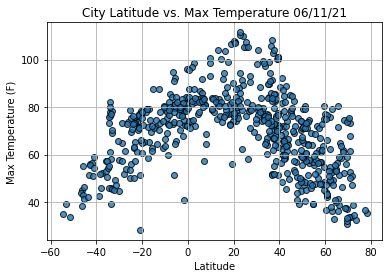

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

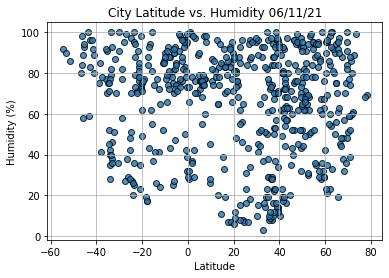

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

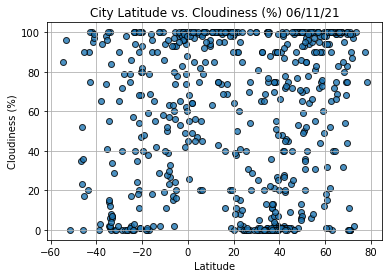

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

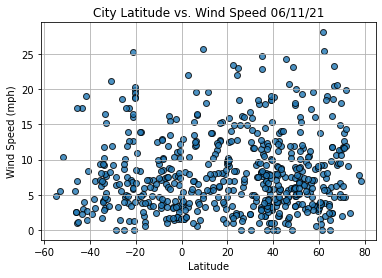

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [42]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values,'r')
    
    # Annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color='red')
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [43]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

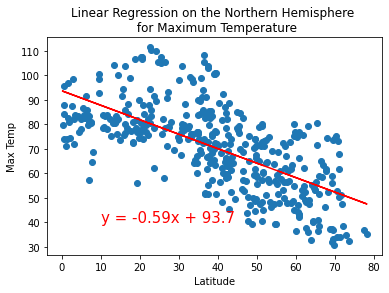

In [52]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp', (10,40))

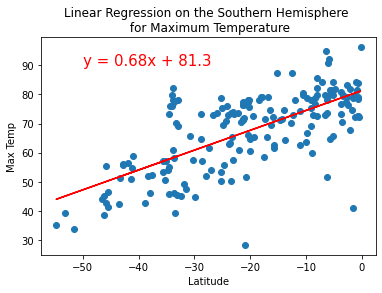

In [53]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

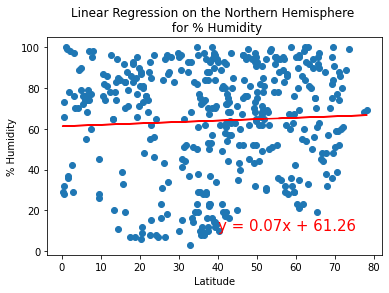

In [54]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

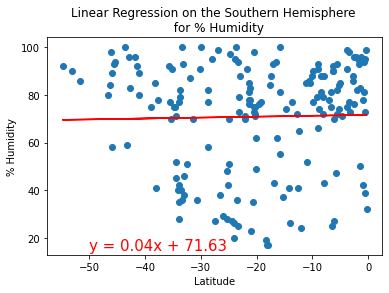

In [55]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n  for % Humidity', '% Humidity',(-50,15))

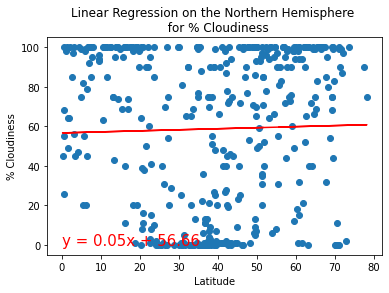

In [59]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n  for % Cloudiness', '% Cloudiness',(0,0))

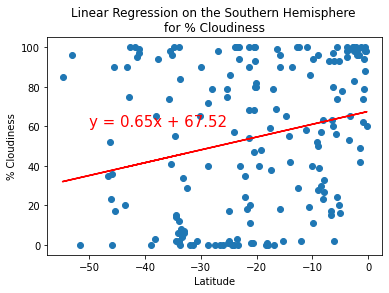

In [61]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Cloudiness', '% Cloudiness',(-50,60))

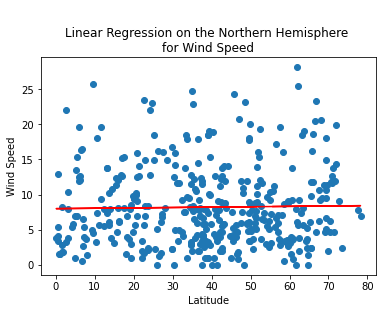

In [66]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Wind Speed', 'Wind Speed', (40,35))

In [67]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n
                        for Wind Speed', 'Wind Speed',(-50,35))

SyntaxError: EOL while scanning string literal (<ipython-input-67-8c4f0e57bb27>, line 6)